In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

#TensorFlow and Keras for LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the Dataset

In [2]:
df=pd.read_csv("Data Science/bitcoin.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
index=df.index
index

RangeIndex(start=0, stop=2713, step=1)

# Resetting the Index with Date Column

In [5]:
#df.drop("index",axis=1,inplace=True)
df=df.set_index(pd.to_datetime(df["Date"]))
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200


In [6]:
df["Month"]=df.index.month
df["Year"]=df["Date"].astype("str").str.split("-").str[0]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
Date,,,,,,,,,
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,9,2014
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,9,2014
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,9,2014
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,9,2014
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,9,2014


In [7]:
df=df.drop("Date", axis=1)
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,Month,Year
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,9,2014
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,9,2014


# Simple Moving Averages

In [8]:
close_array=np.array(df["Close"])
#print (len(close_array))
def simple_moving_avg(price, window):
    sma=[]
    sum=0.0,
    for i in range(window):
        sma.append(np.nan)
    for i in range(window, len(price)):
        for j in range(i-window,i):
            sum+=price[j]
        val=sum/window
        sma.append(val)
    return sma

df["Simple_Moving_Average_10"]=simple_moving_avg(close_array,10)
df["Simple_Moving_Average_20"]=simple_moving_avg(close_array,20)
#df.head(22)
df.tail(2)  

,Open,High,Low,Close,Adj Close,Volume,Month,Year,Simple_Moving_Average_10,Simple_Moving_Average_20
Date,,,,,,,,,,
2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,2,2022,[30447459.025318164],[30234458.54648919]
2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160,2,2022,[30490103.70539636],[30275909.125981532]


# Exponential Moving Averages

In [9]:
def exp_moving_avg(price,window):
    multiplier=2/(window+1)
    ema=[]
    sum=0.0
    for i in range(window):
        ema.append(np.nan)
    for i in range(window):
        sum+=price[i]
    ema.append(sum/window)
    for i in range(window+1,len(price)):
        val=(price[i]*multiplier)+(ema[i-1]*(1-multiplier))
        ema.append(val)
    return ema

df["Exp_Moving_Avg_10"]=exp_moving_avg(close_array,10)
df["Exp_Moving_Avg_20"]=exp_moving_avg(close_array,20)
#df.head(22)
df.tail(2)

,Open,High,Low,Close,Adj Close,Volume,Month,Year,Simple_Moving_Average_10,Simple_Moving_Average_20,Exp_Moving_Avg_10,Exp_Moving_Avg_20
Date,,,,,,,,,,,,
2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,2,2022,[30447459.025318164],[30234458.54648919],42016.358910,41690.039682
2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160,2,2022,[30490103.70539636],[30275909.125981532],41672.735415,41541.124444


# Bollinger Bands

In [10]:
def STD(price, window):
    std=[]
    sum,sq_sum,var,mean,val= 0.0,0.0,0.0,0.0,0.0
    for i in range(window):
        std.append(np.nan)
    for i in range(window, len(price)):
        for j in range((i-window)+1,i+1):
            sum+=price[j]
        mean=sum/window
        sq_sum+=(price[i]-mean)**2
        var=sq_sum/window
        val=np.sqrt(var)
        std.append(val)
    return std

def bollinger_bands(df,window):
    df["BB_Middle"]=simple_moving_avg(close_array, window)
    df["BB_Std"]=STD(close_array, window)
    df["BB_Upper"]=df["BB_Middle"]+(df["BB_Std"]*2)
    df["BB_Lower"]=df["BB_Middle"]-(df["BB_Std"]*2)
    return df

#Taking Standard 20 day window to calculate the values
df=bollinger_bands(df,20)
df.head()      

,Open,High,Low,Close,Adj Close,Volume,Month,Year,Simple_Moving_Average_10,Simple_Moving_Average_20,Exp_Moving_Avg_10,Exp_Moving_Avg_20,BB_Middle,BB_Std,BB_Upper,BB_Lower
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Realtive Strength Index

In [11]:
def RSI(price, window):
    gain, loss=[],[]
    avg_gain, avg_loss, rsi=[],[],[]
    delta, rs, val= 0.0,0.0,0.0
    
    #The first values will be null 
    gain.append(np.nan)
    loss.append(np.nan)

    #Storing for 14 values as null in all these arrays
    for i in range(window):
        avg_gain.append(np.nan)
        avg_loss.append(np.nan)
        rsi.append(np.nan)

    # Calculating Delta
    for i in range(1, len(price)):
        delta=price[i]-price[i-1]
        if (delta>0):
            gain.append(delta)
        else:
            gain.append(0)
        if (delta<0):
            loss.append(np.abs(delta))
        else:
            loss.append(0)

    #The first value of Average Gain and Average Loss is the mean or last 14 days loss or gain respectively
    sum1, sum2= 0.0,0.0
    for i in range(1,window+1):
        sum1+=gain[i]
        sum2+=loss[i]
    avg_gain.append(sum1/window)
    avg_loss.append(sum2/window)

    #Calculating the subsequent Average Gain and Loss Values
    val1, val2=0.0,0.0
    for i in range(window+1,len(price)):
        val1=((avg_gain[i-1]*13) + gain[i])/window
        avg_gain.append(val1)
        val2=((avg_loss[i-1]*13) + loss[i])/window
        avg_loss.append(val2)

    #
    for i in range(window, len(price)):
        rs=avg_gain[i]/avg_loss[i]
        val=100-(100/(1+rs))
        rsi.append(val)
    return rsi

df["RSI"]=RSI(close_array, 14)     
df.head(22)

,Open,High,Low,Close,Adj Close,Volume,Month,Year,Simple_Moving_Average_10,Simple_Moving_Average_20,Exp_Moving_Avg_10,Exp_Moving_Avg_20,BB_Middle,BB_Std,BB_Upper,BB_Lower,RSI
Date,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,9,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df["RSI"].isnull().sum()

14

# Visualizations

## Price Trends Over Time

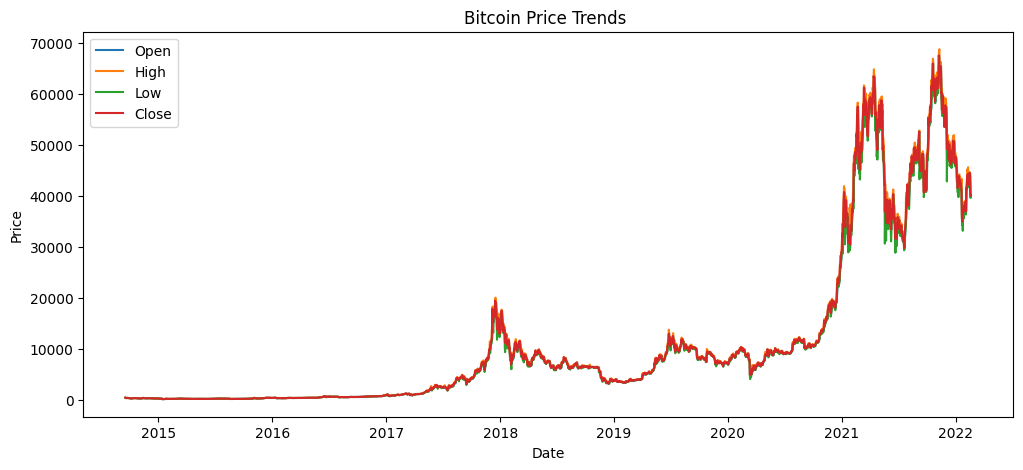

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df["Open"], label="Open")
plt.plot(df.index,df["High"], label="High")
plt.plot(df.index,df["Low"], label="Low")
plt.plot(df.index,df["Close"], label="Close")
plt.title("Bitcoin Price Trends ")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Closing Price Trends with Moving Averages

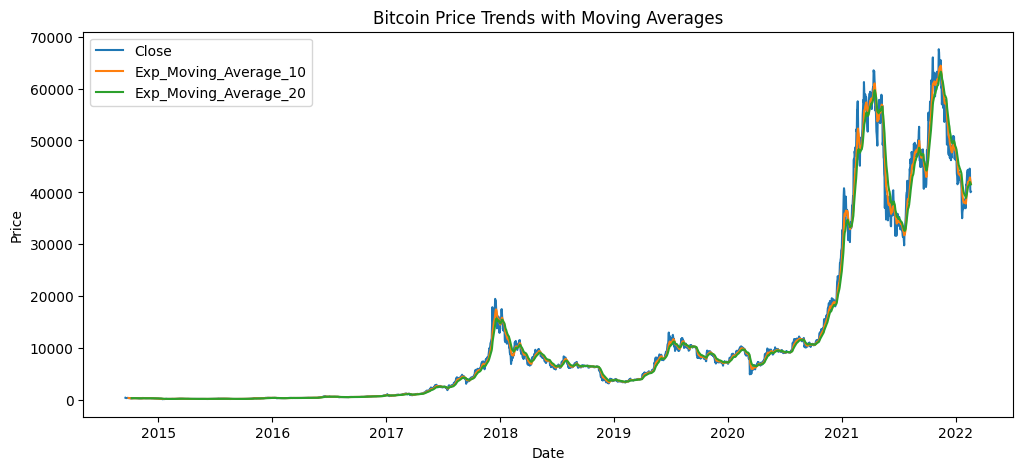

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df["Close"], label="Close")
#plt.plot(df1.index,df1["Moving_Average_10"], label="Moving_Average_10")
plt.plot(df.index,df["Exp_Moving_Avg_10"], label="Exp_Moving_Average_10")
plt.plot(df.index,df["Exp_Moving_Avg_20"], label="Exp_Moving_Average_20")
#plt.plot(df1.index,df1["Moving_Average_20"], label="Moving_Average_20")
plt.title("Bitcoin Price Trends with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Closing price with Bollinger Bands

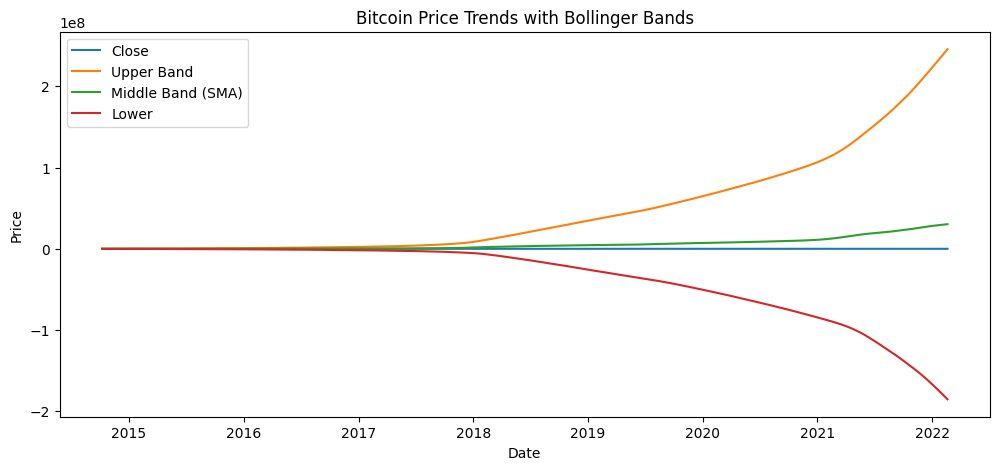

In [27]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df["Close"], label="Close")
plt.plot(df.index,df["BB_Upper"], label="Upper Band")
plt.plot(df.index,df["BB_Middle"], label="Middle Band (SMA)")
plt.plot(df.index,df["BB_Lower"], label="Lower")
plt.title("Bitcoin Price Trends with Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Scatter Plot: Price vs Volume

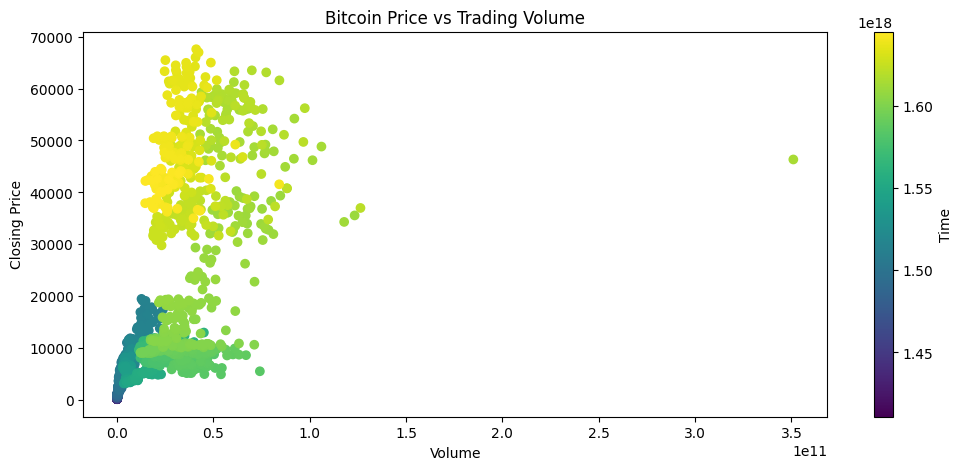

In [14]:
plt.figure(figsize=(12,5))
plt.scatter(df["Volume"],df["Close"], c=df.index)
plt.colorbar(label="Time")
plt.title("Bitcoin Price vs Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
#plt.legend()
plt.show()

## Monthly Trends

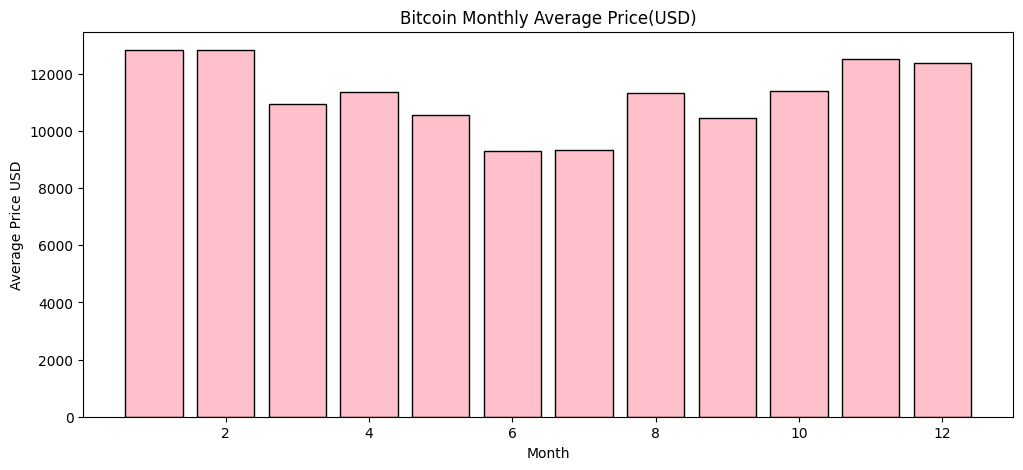

In [15]:
monthly_avg=df.groupby("Month")["Close"].mean()
plt.figure(figsize=(12,5))
plt.bar(monthly_avg.index, monthly_avg.values, color= "pink", edgecolor="black")
plt.title('Bitcoin Monthly Average Price(USD)')
plt.xlabel("Month")
plt.ylabel("Average Price USD")
plt.show()

## Yearly Trends 

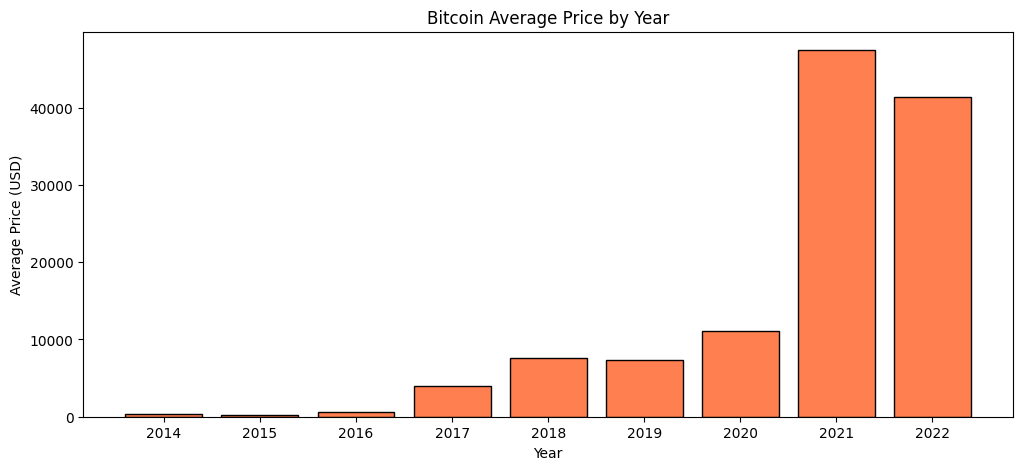

In [16]:
yearly_avg=df.groupby("Year")["Close"].mean()
plt.figure(figsize=(12,5))
plt.bar(yearly_avg.index,yearly_avg.values, color= "coral", edgecolor="black")
plt.title("Bitcoin Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.show()

## Correlation Matrix

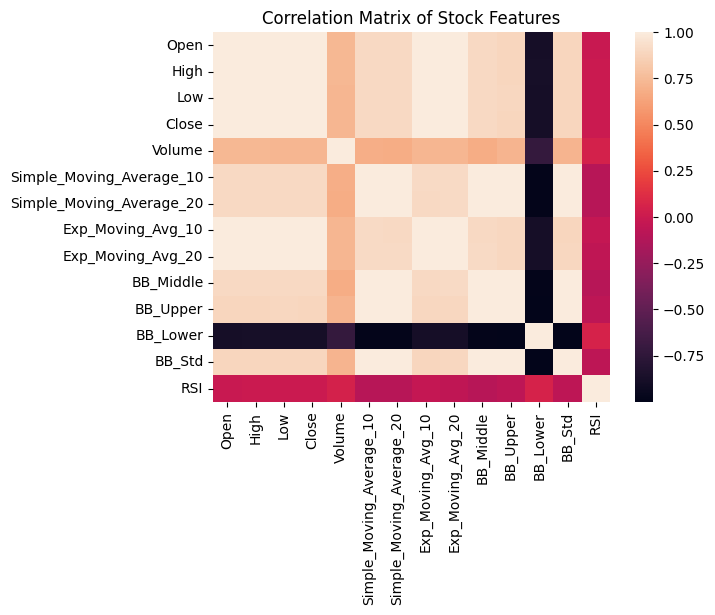

In [32]:
corr_matrix=df[["Open","High","Low","Close","Volume",
              "Simple_Moving_Average_10","Simple_Moving_Average_20","Exp_Moving_Avg_10","Exp_Moving_Avg_20",
              "BB_Middle","BB_Upper","BB_Lower","BB_Std", "RSI"]].corr()
sns.heatmap(corr_matrix)
plt.title("Correlation Matrix of Stock Features")
plt.show()

# Selecting Features for training the XGBoost and LSTM model

In [17]:
features=[]
for col in df.columns:
    datatypes=df[col].dtypes
    if ((datatypes=='int64') or (datatypes == 'float64')):
        features.append(col)
print (features)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Exp_Moving_Avg_10', 'Exp_Moving_Avg_20', 'BB_Std', 'RSI']


Here, it is detected that many of the float and integer columns do not get included inside the features list. We need to check the datatypes of the columns added as indicators.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2713 entries, 2014-09-17 to 2022-02-19
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Open                      2713 non-null   float64
 1   High                      2713 non-null   float64
 2   Low                       2713 non-null   float64
 3   Close                     2713 non-null   float64
 4   Adj Close                 2713 non-null   float64
 5   Volume                    2713 non-null   int64  
 6   Month                     2713 non-null   int32  
 7   Year                      2713 non-null   object 
 8   Simple_Moving_Average_10  2703 non-null   object 
 9   Simple_Moving_Average_20  2693 non-null   object 
 10  Exp_Moving_Avg_10         2703 non-null   float64
 11  Exp_Moving_Avg_20         2693 non-null   float64
 12  BB_Middle                 2693 non-null   object 
 13  BB_Std                    2693 non-null   flo

As expected, Simple Moving Averages columns and Bollinger Bands columns are getting added as String values, i.e. Object Datatypes.
Hence, we need some other method to add the indicators in features list.

## Dropping off the Null values to select the features

In [19]:
df=df.dropna(axis=0)
df.isnull().sum()

Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
Month                       0
Year                        0
Simple_Moving_Average_10    0
Simple_Moving_Average_20    0
Exp_Moving_Avg_10           0
Exp_Moving_Avg_20           0
BB_Middle                   0
BB_Std                      0
BB_Upper                    0
BB_Lower                    0
RSI                         0
dtype: int64

# Selecting Features for XGBoost Model Training

In [141]:
xgb_features_training=[]
for col in df.columns:
    if (col not in ["Date","Close","Adj Close", "Month", "Year"]): # if ((col!="Date") & (col)!= "Adj Close"))--> This syntax also works
        xgb_features_training.append(col)
print("Elements in the training list-",xgb_features_training) #Close excluded from training Features
print("No. of training features-",len(xgb_features_training))
print("Selection Done")

Elements in the training list- ['Open', 'High', 'Low', 'Volume', 'Simple_Moving_Average_10', 'Simple_Moving_Average_20', 'Exp_Moving_Avg_10', 'Exp_Moving_Avg_20', 'BB_Middle', 'BB_Std', 'BB_Upper', 'BB_Lower', 'RSI']
No. of training features- 13
Selection Done


## Train_Test Split for XGBoost Training

In [143]:
xgb_data=df[xgb_features_training].values
#target=df["Close"].values

train_size= int(len(xgb_data)*0.8)

xgb_X_train, xgb_Y_train= xgb_data[:train_size], target[:train_size]
xgb_X_test, xgb_Y_test= xgb_data[train_size:], target[train_size:]

print("No. of training samples", len(X_train))
print("No. of testing samples", len(X_test))

No. of training samples 2154
No. of testing samples 539


## Normalizing XGBoost Features and Target using scalers separately for XGBoost

In [144]:
xgb_sc_features=MinMaxScaler(feature_range=(0,1))
#xgb_sc_target=MinMaxScaler(feature_range=(0,1))

xgb_X_train_scaled= xgb_sc_features.fit_transform(xgb_X_train)
xgb_X_test_scaled= xgb_sc_features.transform(xgb_X_test)

#xgb_Y_train_scaled= xgb_sc_target.fit_transform(xgb_Y_train.reshape(-1,1))
#xgb_Y_test_scaled= xgb_sc_target.transform(xgb_Y_test.reshape(-1,1))

print("Scaling Done Successfully for XGBoost")

Scaling Done Successfully for XGBoost


Here , I'm using unscaled target values, that is using raw close prices. Scaling done only on Features( Close not included)

# XGBoost Training Model

In [145]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

### XGBoost Regressor with optimized parameters
#### Initialize the XGBoost Model

In [146]:
xgb_model=xgb.XGBRegressor(n_estimators=100,max_depth=3,learning_rate=0.1, subsample= 0.7, colsample_bytree=0.7, 
                           min_child_weight=10, gamma=2.0, reg_alpha=2.0, reg_lambda=3.0, random_state=42, n_jobs=-1,
                           early_stopping_rounds=30, objective="reg:squarederror")
print("Structure Completed")

Structure Completed


## Training the XGBoost Model

In [147]:
Y_train_flat= xgb_Y_train.ravel()
Y_test_flat= xgb_Y_test.ravel()

xgb_model.fit(xgb_X_train_scaled, Y_train_flat, eval_set=[(xgb_X_train_scaled, Y_train_flat), (xgb_X_test_scaled, Y_test_flat)],
              verbose= 0)
print("\nTraining Completed")
print(f"\nBest Iteration: {xgb_model.best_iteration}")
print(f"\nNumber of Trees used: {xgb_model.n_estimators}")


Training Completed

Best Iteration: 75

Number of Trees used: 100


# Make Predictions

### Predictions on Training Set

In [148]:
xgb_Y_train_pred = xgb_model.predict(xgb_X_train_scaled) 
xgb_Y_test_pred = xgb_model.predict(xgb_X_test_scaled)

#xgb_Y_train_pred_scaled= xgb_model.predict(xgb_X_train_scaled) 
#xgb_Y_test_pred_scaled = xgb_model.predict(xgb_X_test_scaled) 

print(f"\nTraining Predictions Shape: {xgb_Y_train_pred.shape}")
print(f"\nTesting Predictions Shape: {xgb_Y_test_pred.shape}")


Training Predictions Shape: (2154,)

Testing Predictions Shape: (539,)


Predicting Raw Prices

### Important Checks for Scaling

In [149]:
train_pred_range= xgb_Y_train_pred.max()- xgb_Y_train_pred.min()
test_pred_range= xgb_Y_test_pred.max()- xgb_Y_test_pred.min()
train_actual_range= Y_train_flat.max()- Y_train_flat.min()
test_actual_range= Y_test_flat.max()- Y_test_flat.min()

In [150]:
print("Training Prediction Range:",train_pred_range)
print("\nTesting Prediction Range:",test_pred_range)
print("\nActual Training Range:",train_actual_range)
print("\nActual Testing Range:", test_actual_range)

Training Prediction Range: 17712.766

Testing Prediction Range: 7539.259

Actual Training Range: 19319.297393999997

Actual Testing Range: 57435.311523


In [151]:
if (test_pred_range/test_actual_range<0.2):
    print("Test Predictions have narrow range")
elif (test_pred_range/test_actual_range>0.5):
    print("Test Predictions have reasonable range")

Test Predictions have narrow range


Model predicting near-constant value for test set

## Evaluation Metrics of Model For Prediction on Raw Prices

In [152]:
xgb_train_mae=mean_absolute_error(xgb_Y_train, xgb_Y_train_pred)
xgb_train_rmse=np.sqrt(mean_squared_error(xgb_Y_train, xgb_Y_train_pred))
xgb_train_r2=r2_score(xgb_Y_train, xgb_Y_train_pred)

xgb_test_mae=mean_absolute_error(xgb_Y_test, xgb_Y_test_pred)
xgb_test_rmse=np.sqrt(mean_squared_error(xgb_Y_test, xgb_Y_test_pred))
xgb_test_r2=r2_score(xgb_Y_test, xgb_Y_test_pred)

print("A.Model Evaluation Metrics during Training (Unscaled/Raw Close Prices")
print("\n1.Mean Absolute Error=", xgb_train_mae)
print("\n2.Root Mean Squared Error=", xgb_train_rmse)
print("\n3.R2 Score=", xgb_train_r2)

print("\nB.Model Evaluation Metrics during Testing (Unscaled/Raw Close Prices)")
print("\n1.Mean Absolute Error=", xgb_test_mae)
print("\n2.Root Mean Squared Error=", xgb_test_rmse)
print("\n3.R2 Score=", xgb_test_r2)

A.Model Evaluation Metrics during Training (Unscaled/Raw Close Prices

1.Mean Absolute Error= 69.24330534133762

2.Root Mean Squared Error= 138.4344567702193

3.R2 Score= 0.9988662365144862

B.Model Evaluation Metrics during Testing (Unscaled/Raw Close Prices)

1.Mean Absolute Error= 23255.359706650743

2.Root Mean Squared Error= 27440.699537689594

3.R2 Score= -2.022132470915485


Diagnosis: Severe overfitting - model memorized training data but failed completely on test data.

# Visualization for the First Training Model using Raw Close Prices

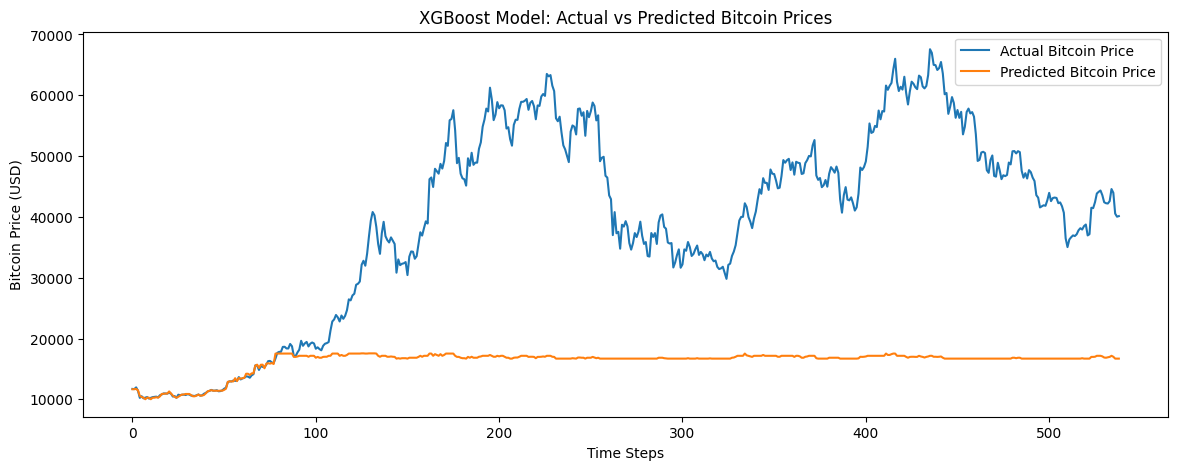

In [154]:
plt.figure(figsize=(14,5))
plt.plot(xgb_Y_test,label="Actual Bitcoin Price")
plt.plot(xgb_Y_test_pred,label="Predicted Bitcoin Price")
plt.title("XGBoost Model: Actual vs Predicted Bitcoin Prices")
plt.xlabel("Time Steps")
plt.ylabel("Bitcoin Price (USD)")
plt.legend()
plt.show()

Attempted Solutions:

Removed target scaling (didn't help)
                        
Adjusted model parameters (didn't help)
                           
Feature engineering (didn't help)

## Training Another Model with scaled Close prices

### Scaling the Close Prices

In [155]:
#xgb_sc_features=MinMaxScaler(feature_range=(0,1))
xgb_sc_target=MinMaxScaler(feature_range=(0,1))

xgb_Y_train_scaled= xgb_sc_target.fit_transform(xgb_Y_train.reshape(-1,1))
xgb_Y_test_scaled= xgb_sc_target.transform(xgb_Y_test.reshape(-1,1))

In [156]:
Y_train_flat_scaled=xgb_Y_train_scaled.ravel()
Y_test_flat_scaled=xgb_Y_test_scaled.ravel()
print("Scaling and Flattening of Close prices done, ready for fitting on model")

Scaling and Flattening of Close prices done, ready for fitting on model


In [157]:
xgb_model1=xgb.XGBRegressor(n_estimators=100,max_depth=3,learning_rate=0.1, subsample= 0.7, colsample_bytree=0.7, 
                           min_child_weight=10, gamma=2.0, reg_alpha=2.0, reg_lambda=3.0, random_state=42, n_jobs=-1,
                           early_stopping_rounds=30, objective="reg:squarederror")

xgb_model1.fit(xgb_X_train_scaled, Y_train_flat_scaled, eval_set=[(xgb_X_train_scaled, Y_train_flat_scaled), (xgb_X_test_scaled, Y_test_flat_scaled)],
              verbose=0)
print("\nTraining Completed")
print(f"\nBest Iteration: {xgb_model1.best_iteration}")
print(f"\nNumber of Trees used: {xgb_model1.n_estimators}")


Training Completed

Best Iteration: 24

Number of Trees used: 100


## Predictions

In [158]:
xgb_Y_train_pred_scaled= xgb_model1.predict(xgb_X_train_scaled) 
xgb_Y_test_pred_scaled = xgb_model1.predict(xgb_X_test_scaled) 

print(f"\nTraining Predictions Shape: {xgb_Y_train_pred_scaled.shape}")
print(f"\nTesting Predictions Shape: {xgb_Y_test_pred_scaled.shape}")


Training Predictions Shape: (2154,)

Testing Predictions Shape: (539,)


### Inverse  Transform to get back actual prices

In [159]:
xgb_Y_train_pred1= xgb_sc_target.inverse_transform(xgb_Y_train_pred_scaled.reshape(-1,1))
xgb_Y_test_pred1= xgb_sc_target.inverse_transform(xgb_Y_test_pred_scaled.reshape(-1,1))

xgb_Y_train_actual1= xgb_sc_target.inverse_transform(xgb_Y_train_scaled)
xgb_Y_test_actual1= xgb_sc_target.inverse_transform(xgb_Y_test_scaled)

print("\nInverse Scaling Done")


Inverse Scaling Done


## Important Checking: Range of Test and Train Prediction Output for both scaled and unscaled versions

In [160]:
print(f"Range of Train prediction set:, [{xgb_Y_train_pred_scaled.min()},{xgb_Y_train_pred_scaled.max()}]")
print(f"Range of Test prediction set:, [{xgb_Y_test_pred_scaled.min()},{xgb_Y_test_pred_scaled.max()}]")

Range of Train prediction set:, [0.058315422385931015,0.5186484456062317]
Range of Test prediction set:, [0.46964770555496216,0.5186484456062317]


In [161]:
print(f"Range of Train prediction set after inversing:, [{xgb_Y_train_pred1.min()},{xgb_Y_train_pred1.max()}]")
print(f"Range of Test prediction set after inversing:, [{xgb_Y_test_pred1.min()},{xgb_Y_test_pred1.max()}]")

Range of Train prediction set after inversing:, [1304.716064453125,10198.0263671875]
Range of Test prediction set after inversing:, [9251.3671875,10198.0263671875]


The test predictions are stuck in a narrow range [9251, 10198] = only $947 variation!
This is NOT overfitting - this is a SCALING CATASTROPHE.
Root Cause:
Scaling the target variable, but test prices are outside the training range. When inverse transform is performed, all test predictions get squeezed into the high end of the scaler's range.

# XGBoost Model Evaluation Metrics

In [162]:
xgb_train_mae1=mean_absolute_error(xgb_Y_train_actual1, xgb_Y_train_pred1)
xgb_train_rmse1=np.sqrt(mean_squared_error(xgb_Y_train_actual1, xgb_Y_train_pred1))
xgb_train_r21=r2_score(xgb_Y_train_actual1, xgb_Y_train_pred1)

xgb_test_mae1=mean_absolute_error(xgb_Y_test_actual1, xgb_Y_test_pred1)
xgb_test_rmse1=np.sqrt(mean_squared_error(xgb_Y_test_actual1, xgb_Y_test_pred1))
xgb_test_r21=r2_score(xgb_Y_test_actual1, xgb_Y_test_pred1)

print("A.Model Evaluation Metrics during Training (Unscaled/Raw Close Prices")
print("\n1.Mean Absolute Error=", xgb_train_mae1)
print("\n2.Root Mean Squared Error=", xgb_train_rmse1)
print("\n3.R2 Score=", xgb_train_r21)

print("\nB.Model Evaluation Metrics during Testing (Unscaled/Raw Close Prices)")
print("\n1.Mean Absolute Error=", xgb_test_mae1)
print("\n2.Root Mean Squared Error=", xgb_test_rmse1)
print("\n3.R2 Score=", xgb_test_r21)

A.Model Evaluation Metrics during Training (Unscaled/Raw Close Prices

1.Mean Absolute Error= 715.6866877177525

2.Root Mean Squared Error= 1078.9468567743704

3.R2 Score= 0.9311293514941633

B.Model Evaluation Metrics during Testing (Unscaled/Raw Close Prices)

1.Mean Absolute Error= 29315.304379590332

2.Root Mean Squared Error= 33257.62400671344

3.R2 Score= -3.4392088566584533


The metrics go extremely poor in scaled version of the predictions, unscaled version had R2_score -2.022. Result: R² = -3.4392 (worse!)
Reason: Scaling exacerbated the narrow prediction range issue

# Feature Importance Analysis

In [127]:
feature_importance= xgb_model.feature_importances_
#feature_names= data.columns

### Creating DataFrame for feature importance

In [128]:
importance_df= pd.DataFrame({"Feature": features_training, "Importance": feature_importance})
importance_df[:10]

,Feature,Importance
0,Open,0.366716
1,High,0.236277
2,Low,0.182281
3,Volume,0.000776
4,Simple_Moving_Average_10,0.069738
5,Simple_Moving_Average_20,0.000130
6,Exp_Moving_Avg_10,0.010477
7,Exp_Moving_Avg_20,0.000489
8,BB_Middle,0.000111
9,BB_Std,0.000000


# Visualizations of XGBoost Output for Scaled Closing Prices: Actual vs Predicted

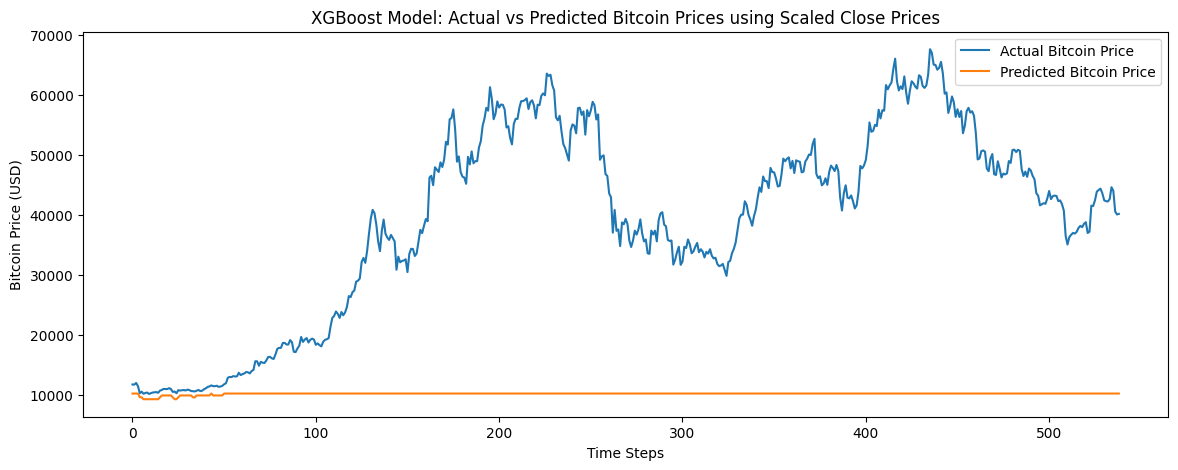

In [164]:
plt.figure(figsize=(14,5))
plt.plot(xgb_Y_test_actual1,label="Actual Bitcoin Price")
plt.plot(xgb_Y_test_pred1,label="Predicted Bitcoin Price")
plt.title("XGBoost Model: Actual vs Predicted Bitcoin Prices using Scaled Close Prices")
plt.xlabel("Time Steps")
plt.ylabel("Bitcoin Price (USD)")
plt.legend()
plt.show()

Poor Plot!

# Random Forrest

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor( n_estimators=100, max_depth=10, min_samples_split= 20, min_samples_leaf=10, max_features= "sqrt",
                                random_state=42, n_jobs=-1, verbose=0)
print("RandomForest Model Created")

RandomForest Model Created


In [114]:
rf_model.fit(xgb_X_train_scaled, xgb_Y_train)
print("RandomForest Training Complete")

RandomForest Training Complete


In [115]:
rf_Y_train_pred= rf_model.predict( xgb_X_train_scaled)
rf_Y_test_pred= rf_model.predict( xgb_X_test_scaled)
print("Random Forrest Predictions done")

Random Forrest Predictions done


## Critical Checks for Working of the Random Forest Model

In [126]:
train_pred_range= rf_Y_train_pred.max()- rf_Y_train_pred.min()
test_pred_range= rf_Y_test_pred.max()- rf_Y_test_pred.min()
train_actual_range= xgb_Y_train.max()- xgb_Y_train.min()
test_actual_range= xgb_Y_test.max()- xgb_Y_test.min()

print("Training Prediction Range:",train_pred_range)
print("\nTesting Prediction Range:",test_pred_range)
print("\nActual Training Range:",train_actual_range)
print("\nActual Testing Range:", test_actual_range)


Training Prediction Range: 16730.69313100677

Testing Prediction Range: 4217.112234735216

Actual Training Range: 19319.297393999997

Actual Testing Range: 57435.311523


In [124]:
if (test_pred_range/test_actual_range>0.3):
    print("Good Prediction Range")
else:
    print("Narrow Prediction Range")

Narrow Prediction Range


# Checking Model Evaluation Metrics for Random Forest Regressor Model

In [125]:
rf_test_mae=mean_absolute_error(xgb_Y_test, rf_Y_test_pred)
rf_test_rmse=np.sqrt(mean_squared_error(xgb_Y_test, rf_Y_test_pred))
rf_test_r2=r2_score(xgb_Y_test, rf_Y_test_pred)

print("\nModel Evaluation Metrics during Testing")
print("\n1.Mean Absolute Error=", rf_test_mae)
print("\n2.Root Mean Squared Error=", rf_test_rmse)
print("\n3.R2 Score=", rf_test_r2)


Model Evaluation Metrics during Testing

1.Mean Absolute Error= 25467.023966720517

2.Root Mean Squared Error= 29596.847127305606

3.R2 Score= -2.5157180498185547


Predictions on the test set are all clustered in a tiny range [9251 to 10198] - that's only $947 variation, while Bitcoin actually varies by thousands of dollars! This is a SCALING ISSUE, not overfitting.
Random Forest also failed with negative R², confirming the issue was not model-specific but data-related.

Root Cause:

Model not confident on out-of-distribution test data
Defaulting to predicting near-mean values
XGBoost/RF limited by training data range

# Chosing our features and target for LSTM Model

In [20]:
features_training=[]
for col in df.columns:
    if (col not in ["Date","Adj Close", "Month", "Year"]): # if ((col!="Date") & (col)!= "Adj Close"))--> This syntax also works
        features_training.append(col)
print("Elements in the training list-",features_training)
print("No. of training features-",len(features_training))
print("Selection Done")

Elements in the training list- ['Open', 'High', 'Low', 'Close', 'Volume', 'Simple_Moving_Average_10', 'Simple_Moving_Average_20', 'Exp_Moving_Avg_10', 'Exp_Moving_Avg_20', 'BB_Middle', 'BB_Std', 'BB_Upper', 'BB_Lower', 'RSI']
No. of training features- 14
Selection Done


## Normalizing our data and target for LSTM model

In [21]:
data=df[features_training].values
target=df["Close"].values

from sklearn.preprocessing import MinMaxScaler
sc_features=MinMaxScaler(feature_range=(0,1))
sc_target=MinMaxScaler(feature_range=(0,1))

split_ratio=0.8
split_length=int(len(data)*split_ratio)

X_train, X_test= data[:split_length], data[split_length:]
Y_train, Y_test= target[:split_length], target[split_length:]

X_train_scaled= sc_features.fit_transform(X_train)
X_test_scaled= sc_features.transform(X_test)

Y_train_scaled= sc_target.fit_transform(Y_train.reshape(-1,1))
Y_test_scaled= sc_target.transform(Y_test.reshape(-1,1))

print("Splitting and Scaling Done Successfully")

Splitting and Scaling Done Successfully


# Creating Sequences

In [23]:
def create_sequences(feature_val, target_val, time_steps):
    X,Y=[],[]
    for i in range(time_steps, len(feature_val)):
        X.append(feature_val[i-time_steps:i])
        Y.append(target_val[i])
    return np.array(X), np.array(Y)

time_steps=60
X_train_seq, Y_train_seq= create_sequences(X_train_scaled, Y_train_scaled, time_steps)
X_test_seq, Y_test_seq= create_sequences(X_test_scaled, Y_test_scaled, time_steps)

print(f"{X_train_seq.shape[0]} training samples, {X_train_seq.shape[1]} time steps, {X_train_seq.shape[2]} feature columns")
print(f"{X_test_seq.shape[0]} testing samples")

2094 training samples, 60 time steps, 14 feature columns
479 testing samples


# Building LSTM Model

In [24]:
model=Sequential()

#First Layer- must return sequences for next LSTM Layer
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.3))

#Second Layer- refines patterns
model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.3))

#Third LSTM Layer- further compression
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.3))

#Dense Layer(Hidden- final processing and improves performance
model.add(Dense(units=16, activation= "relu"))

#Output Layer
model.add(Dense(1))

#optimizer=Adam(learning_rate=0.0001)

#Compiling with Adam Optimizer
model.compile(optimizer="adam", loss="mean_squared_error" , metrics=["mae"])

print("Compiled")



Compiled


# Display Model Summary

In [25]:
print("LSTM Model Architecture for Historical Bitcoin Prices")
model.summary()

LSTM Model Architecture for Historical Bitcoin Prices
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           73216     
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 d

## Define Callbacks

In [26]:
early_stopping= EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True, verbose=1)

#from tensorflow.keras.callbacks import ReduceLROnPlateau
#reduce_lr= ReduceLROnPlateau(monitor= "val_loss", factor=0.5, patience=10, min_lr= 0.00001, verbose=1)

# Training the Model

In [27]:
# Training
model_history=model.fit(X_train_seq, Y_train_seq, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping],verbose=1)
print("\nTraining Completed") 

Epoch 1/100


105/105 [==============================] - 13s 64ms/step - loss: 0.0068 - mae: 0.0476 - val_loss: 0.0077 - val_mae: 0.0784
Epoch 2/100
105/105 [==============================] - 5s 50ms/step - loss: 0.0030 - mae: 0.0313 - val_loss: 0.0018 - val_mae: 0.0335
Epoch 3/100
105/105 [==============================] - 5s 50ms/step - loss: 0.0026 - mae: 0.0303 - val_loss: 0.0015 - val_mae: 0.0275
Epoch 4/100
105/105 [==============================] - 6s 53ms/step - loss: 0.0025 - mae: 0.0308 - val_loss: 0.0041 - val_mae: 0.0548
Epoch 5/100
105/105 [==============================] - 5s 50ms/step - loss: 0.0022 - mae: 0.0282 - val_loss: 0.0085 - val_mae: 0.0855
Epoch 6/100
105/105 [==============================] - 5s 51ms/step - loss: 0.0021 - mae: 0.0262 - val_loss: 0.0016 - val_mae: 0.0302
Epoch 7/100
105/105 [==============================] - 6s 56ms/step - loss: 0.0017 - mae: 0.0259 - val_loss: 0.0026 - val_mae: 0.0424
Epoch 8/100
105/105 [==============================] - 5s 5

# Visualize Model Training History

In [28]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


### Check and Plot the available Training and Validation Loss and MAE as metrics for the training

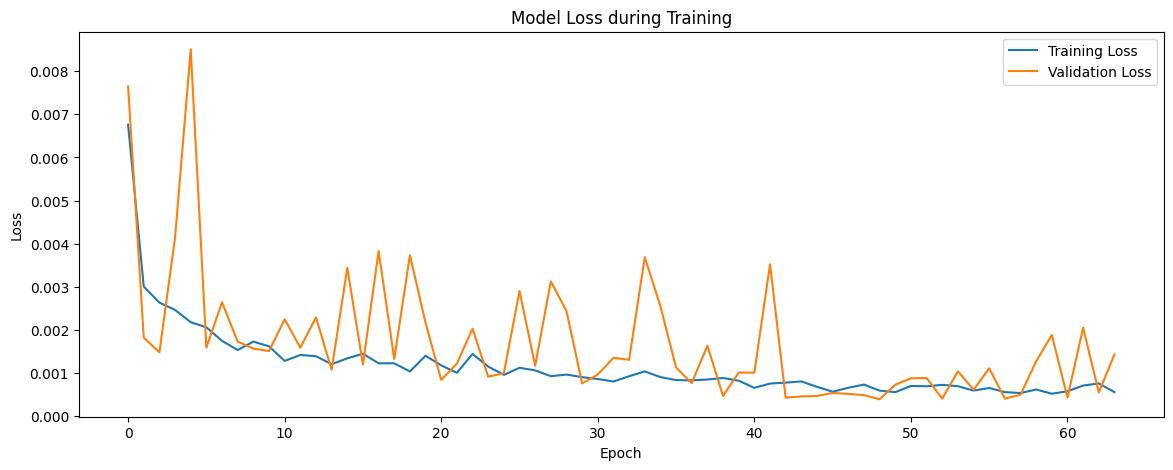

In [29]:
plt.figure(figsize=(14,5))
plt.plot(model_history.history["loss"], label="Training Loss")
plt.plot(model_history.history["val_loss"], label= "Validation Loss")
plt.title("Model Loss during Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

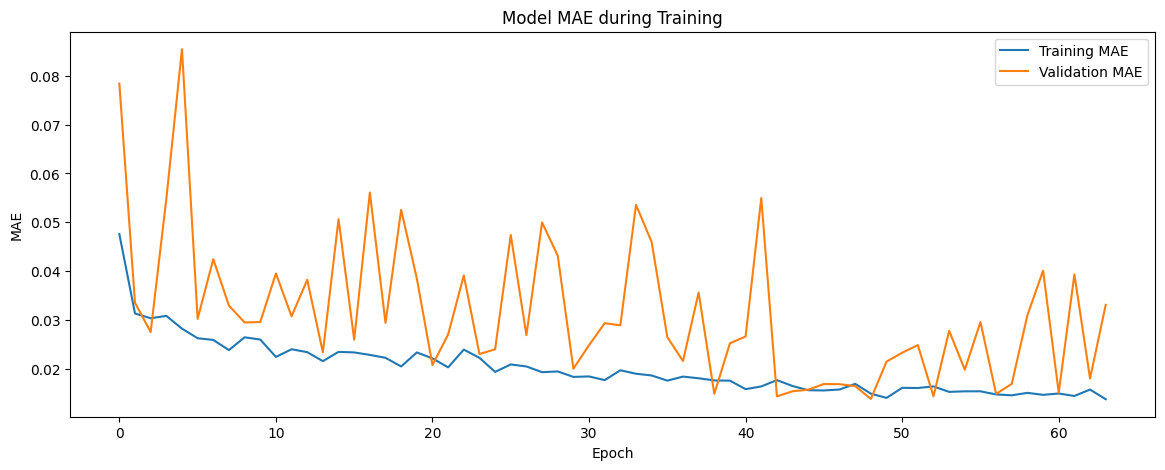

In [30]:
plt.figure(figsize=(14,5))
plt.plot(model_history.history["mae"], label= "Training MAE")
plt.plot(model_history.history["val_mae"], label= "Validation MAE")
plt.title("Model MAE during Training")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.show()

# Making Predictions on Test Set

In [39]:
Y_train_pred_scaled= model.predict(X_train_seq)
Y_test_pred_scaled=model.predict(X_test_seq)
print("Predictions Done")

15/15 [==============================] - 0s 19ms/step
Predictions Done


In [191]:
Y_train_pred_scaled[-5:]

array([[0.5793964 ],
       [0.57661694],
       [0.5734471 ],
       [0.56987494],
       [0.5663875 ]], dtype=float32)

### Problem Checks

In [40]:
print("Scaler Info:")
print(f"Features range: {sc_features.data_max_[0]-sc_features.data_min_[0]}")
print(f"Target range: {sc_target.data_max_[0]-sc_target.data_min_[0]}")

Scaler Info:
Features range: 19298.903778000004
Target range: 19319.297393999997


### Range of Train and Test Prediction values

In [41]:
print(f"Range of Train prediction set:, [{Y_train_pred_scaled.min()},{Y_train_pred_scaled.max()}]")
print(f"Range of Test prediction set:, [{Y_test_pred_scaled.min()},{Y_test_pred_scaled.max()}]")

Range of Train prediction set:, [0.011879082769155502,0.9661059379577637]
Range of Test prediction set:, [0.6507172584533691,1.5668216943740845]


### Re_normalize to bring back actual prices from scaled version

In [42]:
Y_train_pred= sc_target.inverse_transform(Y_train_pred_scaled)
Y_test_pred= sc_target.inverse_transform(Y_test_pred_scaled)

Y_train_actual= sc_target.inverse_transform(Y_train_seq.reshape(-1,1))
Y_test_actual= sc_target.inverse_transform(Y_test_seq.reshape(-1,1))
print("Inverse Scaling Successful") 

Inverse Scaling Successful


In [43]:
print(f"Range of Train prediction set:, [{Y_train_pred.min()},{Y_train_pred.max()}]")
print(f"Range of Test prediction set:, [{Y_test_pred.min()},{Y_test_pred.max()}]")

Range of Train prediction set:, [407.5985107421875,18842.591796875]
Range of Test prediction set:, [12749.50390625,30447.998046875]


# Calculating Model Evaluation Metrics

In [44]:
train_mae=mean_absolute_error(Y_train_actual, Y_train_pred)
train_rmse=np.sqrt(mean_squared_error(Y_train_actual, Y_train_pred))
train_r2=r2_score(Y_train_actual, Y_train_pred)

test_mae=mean_absolute_error(Y_test_actual,Y_test_pred)
test_rmse=np.sqrt(mean_squared_error(Y_test_actual,Y_test_pred))
test_r2=r2_score(Y_test_actual,Y_test_pred)

print("A.Model Evaluation Metrics during Training")
print("\n1.Mean Absolute Error=", train_mae)
print("\n2.Root Mean Squared Error=", train_rmse)
print("\n3.R2 Score=", train_r2)

print("\nB.Model Evaluation Metrics during Testing")
print("\n1.Mean Absolute Error=", test_mae)
print("\n2.Root Mean Squared Error=", test_rmse)
print("\n3.R2 Score=", test_r2)

A.Model Evaluation Metrics during Training

1.Mean Absolute Error= 222.1553124289236

2.Root Mean Squared Error= 351.4499496713458

3.R2 Score= 0.992696620259019

B.Model Evaluation Metrics during Testing

1.Mean Absolute Error= 19757.03836127218

2.Root Mean Squared Error= 21801.102111508684

3.R2 Score= -1.83784481263806


Still severe overfitting, though slightly better than tree-based models.
    
Hypothesis: The multivariate models were struggling because:

Many features were highly correlated (SMA_10, SMA_20, Volume, Exp_Moving_Avg_10,Exp_Moving_Avg_20)
Complex feature interactions caused overfitting
Bitcoin price has strong autocorrelation - past prices alone might be sufficient

Approach: Simplify to univariate model using only Close price

# Visualize Actual vs Predicted Bitcoin Prices

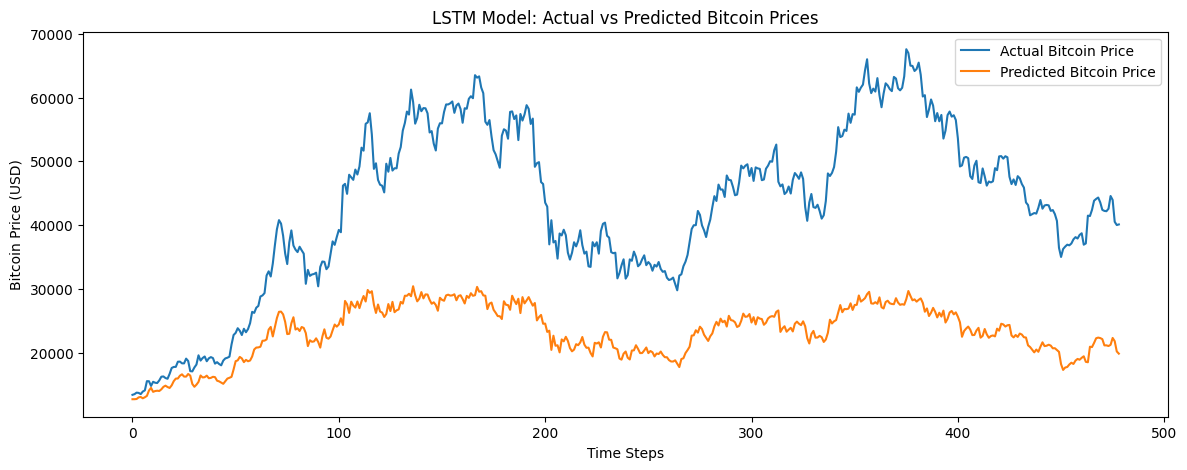

In [45]:
plt.figure(figsize=(14,5))
plt.plot(Y_test_actual,label="Actual Bitcoin Price")
plt.plot(Y_test_pred,label="Predicted Bitcoin Price")
plt.title("LSTM Model: Actual vs Predicted Bitcoin Prices")
plt.xlabel("Time Steps")
plt.ylabel("Bitcoin Price (USD)")
plt.legend()
plt.show()

# Immediate Fix: Build Univariate LSTM Model using Close values only

In [46]:
close_data=df["Close"].values

sc_close=MinMaxScaler(feature_range=(0,1))
close_scaled=sc_close.fit_transform(close_data.reshape(-1,1))

print("Shape of close_scaled:", close_scaled.shape)
print(close_scaled)

Shape of close_scaled: (2693, 1)
[[0.00234585]
 [0.00259445]
 [0.0027738 ]
 ...
 [0.59891189]
 [0.59138785]
 [0.59280431]]


The entire sclaing of Close dataset has been performed using "fit_transform", which is the to be done for single feature training

# Create Sequences for Univariate LSTM 

In [47]:
time_steps=60
def create_univariate_sequences(close_val ,time_steps):
    X, Y=[],[]
    for i in range(time_steps, len(close_val)):
        X.append(close_val[i-time_steps:i,0])
        Y.append(close_val[i])
    return np.array(X),np.array(Y)

X_close_seq, Y_close_seq= create_univariate_sequences(close_scaled, time_steps)
print(f"{X_close_seq.shape[0]} samples, {X_close_seq.shape[1]} time_steps")
print(Y_close_seq.shape)

2633 samples, 60 time_steps
(2633, 1)


# Train_Test Split

In [48]:
train_size= int(len(X_close_seq)*0.8)
print(train_size)
X_train_close=X_close_seq[:train_size]
Y_train_close=Y_close_seq[:train_size]

X_test_close=X_close_seq[train_size:]
Y_test_close=Y_close_seq[train_size:]

print("Univariate Training Samples", len(X_train_close))
print("Univariate Testing Samples", len(X_test_close))

2106
Univariate Training Samples 2106
Univariate Testing Samples 527


# Univariate LSTM Architecture

In [49]:
uni_model=Sequential()

#First LSTM Layer having 
uni_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_close_seq.shape[1],1)))
uni_model.add(Dropout(0.2))

#Second LSTM Layer- refines pattens
uni_model.add(LSTM(units=64, return_sequences=True))
uni_model.add(Dropout(0.2))

#Third LSTM Layer- further compression
uni_model.add(LSTM(units=32, return_sequences=False))
uni_model.add(Dropout(0.2))

#Dense Layer (Hidden)- For final processing and improves performance
uni_model.add(Dense(units=16, activation="relu"))

#Output Layer- Gives one output
uni_model.add(Dense(1))

#Compile with Adam Optimizer
uni_model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

print("Univariate LSTM Architecture Created")

Univariate LSTM Architecture Created


In [50]:
print("Univariate LSTM Model Created")
uni_model.summary()

Univariate LSTM Model Created
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 128)           66560     
                                                                 
 dropout_3 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 64)            49408     
                                                                 
 dropout_4 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)        

## Defimne Callbacks and train the model

In [51]:
early_stopping=EarlyStopping(monitor="val_loss",patience=20, restore_best_weights=True,verbose=1)

uni_model_history= uni_model.fit( X_train_close, Y_train_close, epochs=150, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)
print("\nUnivariate Model Training Completed")

Epoch 1/150
106/106 [==============================] - 13s 69ms/step - loss: 5.6465e-04 - mae: 0.0141 - val_loss: 4.7430e-04 - val_mae: 0.0195
Epoch 2/150
106/106 [==============================] - 6s 56ms/step - loss: 2.2852e-04 - mae: 0.0093 - val_loss: 1.4875e-04 - val_mae: 0.0093
Epoch 3/150
106/106 [==============================] - 6s 52ms/step - loss: 1.7480e-04 - mae: 0.0082 - val_loss: 1.7085e-04 - val_mae: 0.0103
Epoch 4/150
106/106 [==============================] - 6s 58ms/step - loss: 1.7580e-04 - mae: 0.0084 - val_loss: 9.7601e-05 - val_mae: 0.0069
Epoch 5/150
106/106 [==============================] - 6s 57ms/step - loss: 1.6131e-04 - mae: 0.0079 - val_loss: 1.3294e-04 - val_mae: 0.0091
Epoch 6/150
106/106 [==============================] - 6s 55ms/step - loss: 1.4102e-04 - mae: 0.0071 - val_loss: 1.0611e-04 - val_mae: 0.0075
Epoch 7/150
106/106 [==============================] - 5s 51ms/step - loss: 1.1724e-04 - mae: 0.0067 - val_loss: 1.8073e-04 - val_mae: 0.0111
Epoch

# Make Predictions: Crticial tests

In [52]:
Y_pred_close_scaled=uni_model.predict(X_test_close)
print("Predictions Completed")
print("Shape of predictions on test set", Y_pred_close_scaled.shape)

17/17 [==============================] - 1s 18ms/step
Predictions Completed
Shape of predictions on test set (527, 1)


# Convert to actual prices using Inverse Scaling

In [53]:
Y_pred_close= sc_close.inverse_transform(Y_pred_close_scaled.reshape(-1,1))
Y_test_close_actual= sc_close.inverse_transform(Y_test_close.reshape(-1,1))
print("Inverse Scaling Done")

Inverse Scaling Done


In [61]:
print("Scaling Information\n")
print(f"Range of Scaler of Close-({sc_close.data_min_},{sc_close.data_max_})")

Scaling Information

Range of Scaler of Close-([178.102997],[67566.828125])


In [60]:
print(f"Range of Predictions-{Y_pred_close.min()},{Y_pred_close.max()}")
print(f"Range of Actual Close Prices- {Y_test_close_actual.min()},{Y_test_close_actual.max()}")

Range of Predictions-10185.0302734375,49377.71875
Range of Actual Close Prices- 10246.186523,67566.828125


# Univariate Model Evaluation Metrics

In [54]:
mae_close=mean_absolute_error(Y_test_close_actual,Y_pred_close)
rmse_close=np.sqrt(mean_squared_error(Y_test_close_actual,Y_pred_close))
r2_close=r2_score(Y_test_close_actual,Y_pred_close)

print("Model Evaluation Metrics")
print("\nMean Absolute Error=", mae_close)
print("\nRoot Mean Squared Error=", rmse_close)
print("\nR2 Score=", r2_close)

Model Evaluation Metrics

Mean Absolute Error= 8785.303490521108

Root Mean Squared Error= 10264.715681365975

R2 Score= 0.5528257945781647


Success Factors:

1)Positive R² on test set (0.5528)

2)No severe overfitting (reasonable train-test gap)

3)Predictions cover appropriate price range

4)Model generalizes to unseen data

# Visualizing Actual vs Predcited Bitcoin Prices

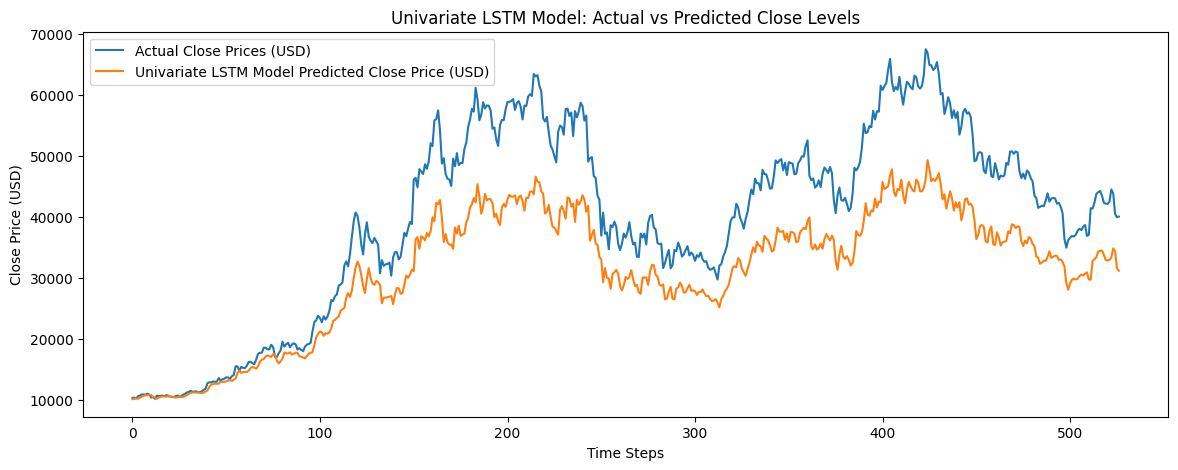

In [55]:
plt.figure(figsize=(14,5))
plt.plot(Y_test_close_actual,label="Actual Close Prices (USD)")
plt.plot(Y_pred_close,label="Univariate LSTM Model Predicted Close Price (USD)")
plt.title("Univariate LSTM Model: Actual vs Predicted Close Levels")
plt.xlabel("Time Steps")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

Why Univariate Worked?

Explanation:

Simplification: Reduced feature space from 14+ to 1.

Autocorrelation: Bitcoin price highly dependent on recent prices.

Less Overfitting: Fewer parameters to tune, less chance to memorize noise.

Data Quality: Close price is the most reliable, directly observed value.

Reduced Multicollinearity: Eliminated correlated features (SMA, EMA, etc.)